In [1]:
import matplotlib.pyplot as plt
from freegs.machine import Coil, Solenoid, Machine
from freegs.jtor import ConstrainBetapIp
from freegs.equilibrium import Equilibrium
from freegs.control import constrain
from freegs import solve
from SOUTH_param import * 

In [2]:
# Parameters subject to change 
PR1 = 0.50
PZ1 = 0.40
PR2 = 0.60
PZ2 = 0.25
PR3 = 0.65
PZ3 = 0.10

coils_positioning = [
    (PR1, PZ1),
    (PR2, PZ2),
    (PR3, PZ3)
]

Ip = 10e3  # Plasma current [Amps]
toroidal_magnetic_field_strength_at_plasma_centre = 0.125 # B_0

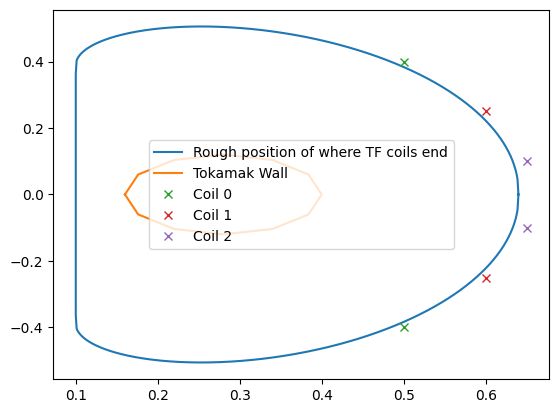

In [12]:
plt.plot(*PrincetonDee(0.1, 0.59 + 0.05), label='Rough position of where TF coils end')
plt.plot(RWall, ZWall, label='Tokamak Wall')

for index, (r, z) in enumerate(coils_positioning):
    plt.plot([r, r], [z, -z], 'x', label='Coil {}'.format(index))
plt.legend()

In [44]:
# Create coils
central_solenoid = [("SOL", Solenoid((inner_radius + outer_radius) / 2, -solenoid_height / 2,  solenoid_height / 2, solenoid_turns, control=False))]

poloidal_coils = [
    ("VF1_U", Coil(PR1, PZ1)),
    ("VF1_L", Coil(PR1, -PZ1)),
    ("VF2_U", Coil(PR2, PZ2)),
    ("VF2_L", Coil(PR2, -PZ2)),
    ("SH1_U", Coil(PR3, PZ3)),
    ("SH1_L", Coil(PR3, -PZ3))
]

In [45]:
# Create tokamak
tokamak = Machine(
    central_solenoid + poloidal_coils,
    walls
)
tokamak['VF1_U'].area = tokamak['VF1_L'].area = tokamak['VF2_U'].area = tokamak['VF2_L'].area = tokamak['SH1_U'].area = tokamak['SH1_L'].area = 4 * 2.1e-4

In [46]:
# Define simulation granularity
eq = Equilibrium(tokamak=tokamak,
                       Rmin=0.01, Rmax=0.7,    # Radial domain
                       Zmin=-0.6, Zmax=0.6,   # Height range
                       nx=129, ny=129          # Number of grid points
                       )

In [47]:
# Define plasma properties constraints
vacuum_toroidal_magnetic_field = plasma_major_radius * toroidal_magnetic_field_strength_at_plasma_centre
profiles = ConstrainBetapIp(eq,
                            0.05,   # Plasma poloidal beta
                            Ip,     # Plasma current [Amps]
                            vacuum_toroidal_magnetic_field)  # Vacuum f=R*Bt

In [48]:
# Define x-points and iso-flux
xpoints = [(0.3, -0.24), (0.3, 0.24)]  # (R,Z) locations of X-points
isoflux = [(0.3, -0.24, 0.3, 0.24)] # (R1,Z1, R2,Z2) pairs

constraints = constrain(xpoints=xpoints, isoflux=isoflux)

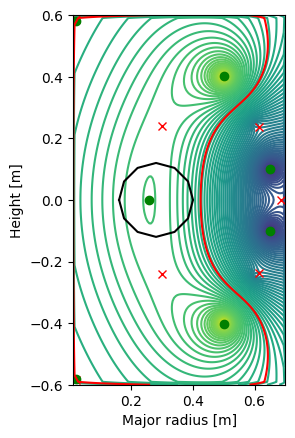

psi_relchange: 0.1356714618702502
bndry_relchange: 1.0
bndry_change: 0.08463271187238758


psi_relchange: 0.009998828534895794
bndry_relchange: 249.2903358254429
bndry_change: -0.08497357375728948


psi_relchange: 0.005285995892187496
bndry_relchange: 0.049061527502425865
bndry_change: -1.758600080268202e-05


psi_relchange: 0.0037294382554735454
bndry_relchange: 0.007072748189756883
bndry_change: 2.517406651402713e-06


psi_relchange: 0.0029131914775483935
bndry_relchange: 0.0036812045399242216
bndry_change: 1.3054472769454635e-06


psi_relchange: 0.0023704984926923127
bndry_relchange: 0.00264212877534092
bndry_change: 9.344959422926194e-07


psi_relchange: 0.0019491368303629624
bndry_relchange: 0.00216064471242296
bndry_change: 7.625519821754254e-07


psi_relchange: 0.0016075864576099428
bndry_relchange: 0.0016313115334573457
bndry_change: 5.747978162302199e-07


psi_relchange: 0.001327361614951483
bndry_relchange: 0.001374777832450182
bndry_change: 4.837423111488711e-07


psi_relcha

In [49]:
solve(eq,
             profiles,
             constraints,
             show=True,
             check_limited=True,
             limit_it = 0
             )
tokamak.printCurrents()